In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding='latin-1')
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding='latin-1')
ratings.columns = ['userID', 'ISBN', 'bookRating']

C:\Users\sapen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expec

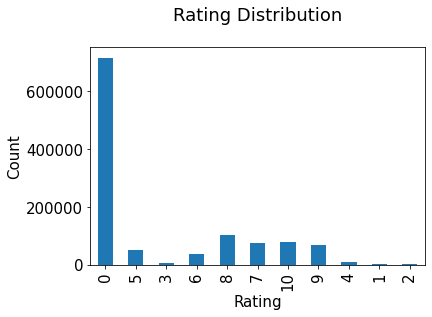

In [5]:
plt.rc('font', size=15)

ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

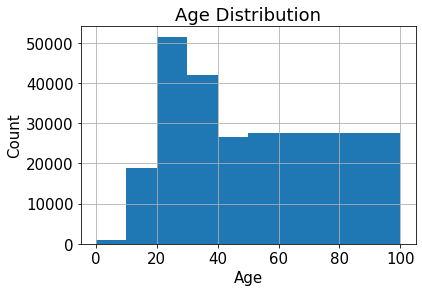

In [5]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Exclude users with less than 200 ratings and books with less than 100 ratings

In [6]:
user_count = ratings['userID'].value_counts()
book_count = ratings['bookRating'].value_counts()

ratings = ratings[ratings['userID'].isin(user_count[user_count >= 200].index)] 
ratings = ratings[ratings['bookRating'].isin(book_count[book_count >= 100].index)]

In [7]:
combined_book_rating = pd.merge(ratings, books, on='ISBN')
combined_book_rating = combined_book_rating.drop({'yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL'}, axis='columns')
combined_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [11]:
book_rating_count = combined_book_rating.groupby('bookTitle')['bookRating'].count().reset_index()
book_rating_count.head()

,bookTitle,bookRating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [13]:
book_rating_count = book_rating_count.rename(columns = {
    'bookRating' : 'totalRatingCount'
})

book_rating_count.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [14]:
combined_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [15]:
rating_with_totalRatingCount = pd.merge(combined_book_rating, book_rating_count, left_on = 'bookTitle', right_on = 'bookTitle', how= 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [16]:
threshold = 50
popular_books  = rating_with_totalRatingCount.query('totalRatingCount >= @threshold')
popular_books.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


### Filter to users in US and Canada only to reduce computation cost

In [18]:
combined = pd.merge(popular_books, users, left_on  = 'userID', right_on = 'userID', how = 'left')
combined.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location,Age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa",48.0
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa",29.0
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82,"n/a, n/a, n/a",NaN
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa",18.0
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa",32.0


In [19]:
us_canada_ratings = combined[combined['Location'].str.contains('usa|canada')]
us_canada_ratings = us_canada_ratings.drop('Age', axis='columns')
us_canada_ratings.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


### Create matrix

In [20]:
# Drop duplicates
us_canada_ratings = us_canada_ratings.drop_duplicates(['userID', 'bookTitle'])

# Create pivot table
us_canada_ratings_pivot = us_canada_ratings.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)

In [21]:
us_canada_ratings_pivot.head()

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


In [23]:
# Create matrix
from scipy.sparse import csr_matrix

us_canada_ratings_matrix = csr_matrix(us_canada_ratings_pivot.values)

<746x734 sparse matrix of type '<class 'numpy.float64'>'
	with 13028 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(us_canada_ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### Test Algorithm

In [30]:
query_index = np.random.choice(us_canada_ratings_matrix.shape[0])
print(query_index)
distance, indices = model.kneighbors(us_canada_ratings_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

154


In [31]:
 us_canada_ratings_pivot.index[query_index]

'Desperation'

In [41]:
for i in range(0, len(distance.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_ratings_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_ratings_pivot.index[indices.flatten()[i]], distance.flatten()))

Recommendations for Desperation:

1: Rose Madder, with distance of [0.         0.46506292 0.50046185 0.50202743 0.52219394 0.52791304]:
2: Black House, with distance of [0.         0.46506292 0.50046185 0.50202743 0.52219394 0.52791304]:
3: Dreamcatcher, with distance of [0.         0.46506292 0.50046185 0.50202743 0.52219394 0.52791304]:
4: Bag of Bones, with distance of [0.         0.46506292 0.50046185 0.50202743 0.52219394 0.52791304]:
5: Insomnia, with distance of [0.         0.46506292 0.50046185 0.50202743 0.52219394 0.52791304]:
